In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('bigdatamart_Train.csv')

In [3]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df.shape

(8523, 12)

In [5]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [6]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

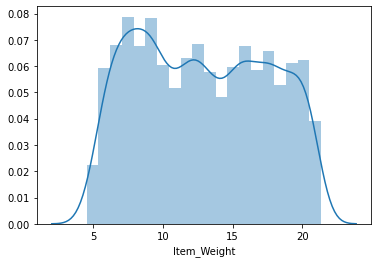

In [7]:
sns.distplot(df['Item_Weight'])

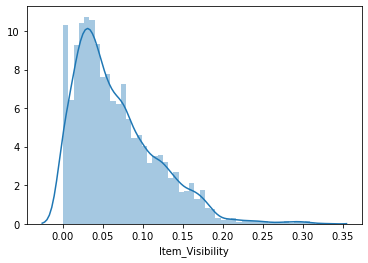

In [8]:
sns.distplot(df['Item_Visibility'])

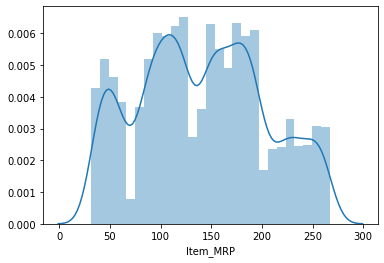

In [9]:
sns.distplot(df['Item_MRP'])

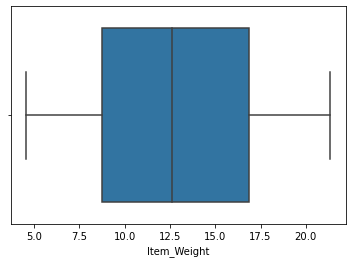

In [10]:
sns.boxplot(df['Item_Weight'])

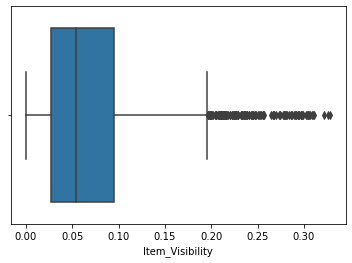

In [11]:
sns.boxplot(df['Item_Visibility'])

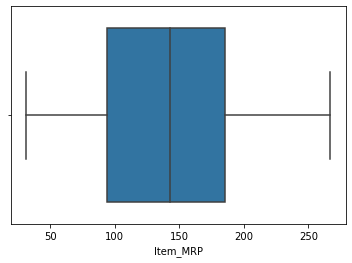

In [12]:
sns.boxplot(df['Item_MRP'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

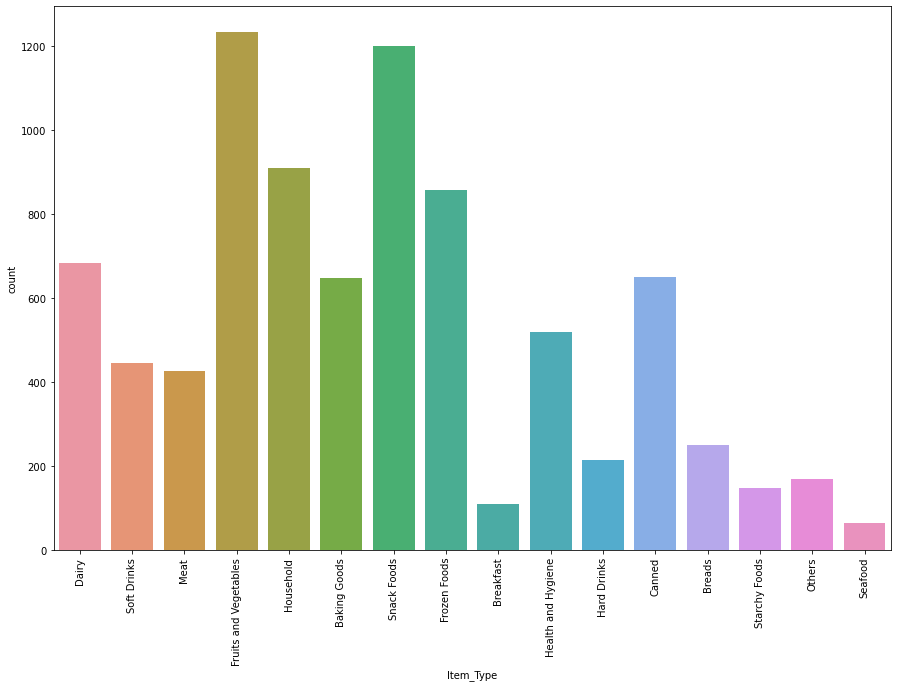

In [13]:
plt.figure(figsize=(15,10))
sns.countplot(df['Item_Type'])
plt.xticks(rotation=90)

In [14]:
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

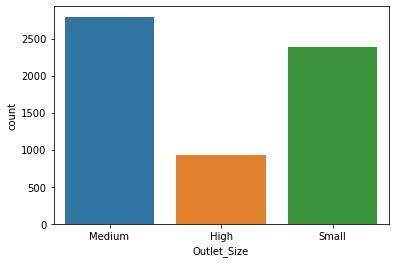

In [15]:
sns.countplot(df['Outlet_Size'])

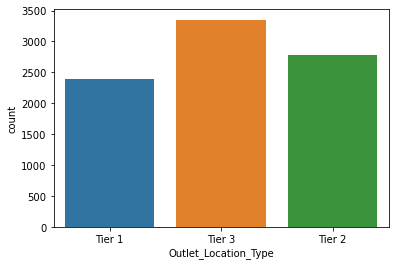

In [16]:
sns.countplot(df['Outlet_Location_Type'])

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

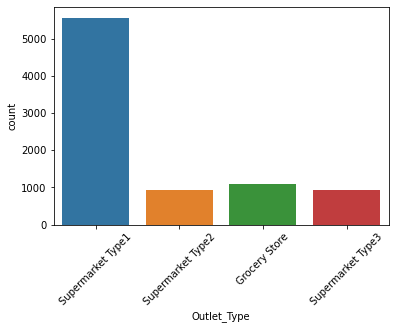

In [17]:
sns.countplot(df['Outlet_Type'])
plt.xticks(rotation=45)

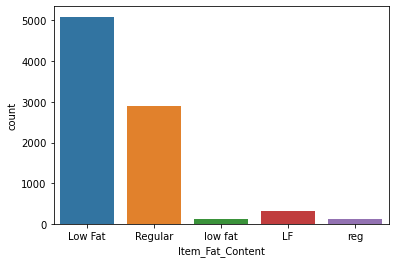

In [18]:
sns.countplot(df['Item_Fat_Content'])

In [19]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':'Low Fat', 'low fat': 'Low Fat','reg':'Regular'})
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

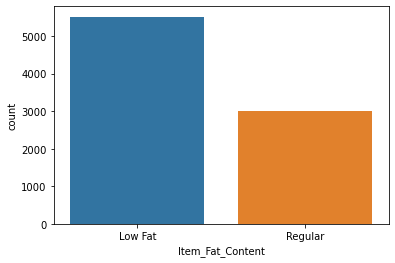

In [20]:
sns.countplot(df['Item_Fat_Content'])

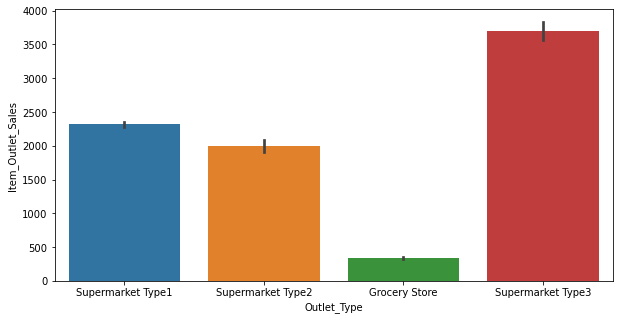

In [21]:
plt.figure(figsize=(10,5))
sns.barplot(
    x=df['Outlet_Type'],
    y=df['Item_Outlet_Sales'],
    order=None,
    hue_order=None,
    orient=None,
    color=None,
    palette=None,
    saturation=0.75,
    dodge=True,
    ax=None
)

In [22]:
df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


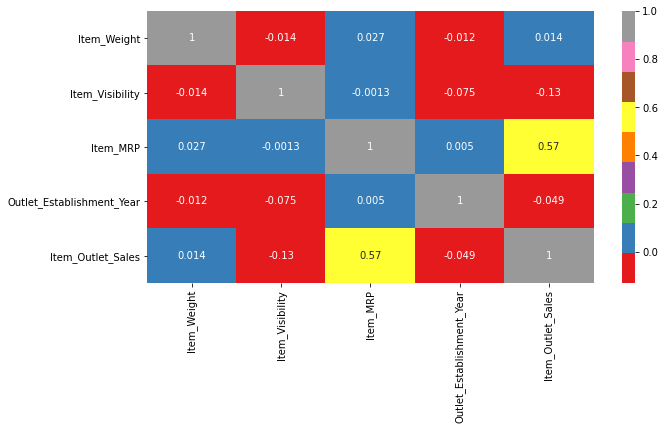

In [23]:
plt.figure(figsize=(10,5))
sns.heatmap(
    df.corr(),
    vmin=None,
    vmax=None,
    cmap='Set1',
    center=None,
    robust=False,
    annot=True,
    fmt='.2g',
    annot_kws=None,
    linewidths=0,
    linecolor='white',
    cbar=True,
    cbar_kws=None,
    cbar_ax=None,
    square=False,
    xticklabels='auto',
    yticklabels='auto',
    mask=None,
    ax=None
)

In [24]:
df['Item_Weight'].mean()

12.857645184136183

In [25]:
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)

In [26]:
df['Outlet_Size'].mode()

0    Medium
dtype: object

In [27]:
df['Outlet_Size'].fillna('Medium', inplace=True)

In [28]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [29]:
df.skew()

Item_Weight                  0.090561
Item_Visibility              1.167091
Item_MRP                     0.127202
Outlet_Establishment_Year   -0.396641
Item_Outlet_Sales            1.177531
dtype: float64

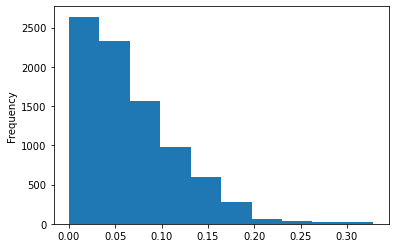

In [30]:
df['Item_Visibility'].plot(kind='hist')

In [31]:
df['Item_Visibility'].fillna(df['Item_Visibility'].median(), inplace=True)

In [32]:
from sklearn.preprocessing import LabelEncoder
le = {}
encoded_values = {}
for x in df.columns:
    if df[x].dtypes == object:
        le[x] = LabelEncoder()
        encoded_values[x] = le[x].fit_transform(df[x])

In [33]:
for x in encoded_values.keys():
    df[x] = encoded_values[x]

In [34]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [35]:
from scipy.stats import zscore
z = np.abs(zscore(df))

np.where(z>3)

(array([  49,   83,  108,  130,  145,  174,  276,  304,  333,  373,  434,
         456,  472,  502,  521,  532,  661,  694,  753,  809,  854,  935,
         991,  997, 1009, 1138, 1159, 1254, 1272, 1291, 1311, 1324, 1434,
        1450, 1496, 1501, 1506, 1560, 1575, 1644, 1651, 1805, 1827, 1841,
        1859, 1998, 2088, 2109, 2122, 2216, 2238, 2251, 2293, 2324, 2439,
        2445, 2516, 2535, 2586, 2613, 2728, 2776, 2855, 2895, 3017, 3083,
        3087, 3098, 3154, 3206, 3234, 3286, 3399, 3407, 3458, 3474, 3488,
        3497, 3540, 3667, 3709, 3720, 3750, 3757, 3767, 3884, 3993, 4006,
        4219, 4289, 4346, 4349, 4382, 4408, 4530, 4656, 4674, 4676, 4681,
        4772, 4789, 4888, 4941, 4961, 4991, 5031, 5065, 5150, 5177, 5185,
        5223, 5287, 5315, 5374, 5500, 5550, 5619, 5732, 5734, 5752, 5795,
        5799, 5812, 5837, 5880, 5891, 5946, 5977, 6000, 6008, 6012, 6134,
        6179, 6334, 6409, 6536, 6537, 6541, 6576, 6606, 6622, 6674, 6786,
        6886, 6903, 6993, 7005, 7016, 

In [36]:
z[130][11]

3.3913544171949606

In [37]:
z[8447][11]

3.168562626821275

In [38]:
df_new = df[(z<=3).all(axis=1)]

In [39]:
df.shape

(8523, 12)

In [40]:
df_new.shape

(8338, 12)

In [41]:
X = df_new.drop(columns=['Item_Identifier', 'Item_Outlet_Sales', 'Outlet_Establishment_Year', 'Outlet_Identifier'])
y = df_new['Item_Outlet_Sales']

In [42]:
X

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.300,0,0.016047,4,249.8092,1,0,1
1,5.920,1,0.019278,14,48.2692,1,2,2
2,17.500,0,0.016760,10,141.6180,1,0,1
3,19.200,1,0.000000,6,182.0950,1,2,0
4,8.930,0,0.000000,9,53.8614,0,2,1
...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,13,214.5218,0,2,1
8519,8.380,1,0.046982,0,108.1570,1,1,1
8520,10.600,0,0.035186,8,85.1224,2,1,1
8521,7.210,1,0.145221,13,103.1332,1,2,2


In [43]:
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8338, dtype: float64

In [44]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .33, random_state = 42)

In [47]:
X_train.shape

(5586, 8)

In [48]:
y_train.shape

(5586,)

In [49]:
lm = LinearRegression()

In [50]:
lm.fit(X_train, y_train)

LinearRegression()

In [51]:
lm.coef_

array([ -16.18526579,   17.54417582,  -54.62871208,   -5.78593231,
        919.95462644, -202.68089913, -349.42313366,  729.58328719])

In [52]:
lm.intercept_

2138.9999463552317

In [53]:
lm.score(X_train, y_train)

0.4959538419041991

In [54]:
pred = lm.predict(X_test)
print('Predicted result price: ', pred)
print('actual price: ', y_test)

Predicted result price:  [2415.91423964 1978.9189078  2676.33396285 ... 1919.42164907 1262.87417144
 3134.28065507]
actual price:  3549    1977.4260
2355    4653.9420
8159    1571.2880
954     1323.6104
5474    7084.1120
          ...    
6747     123.8388
4809    3440.8544
4365    1291.6520
3838     671.1264
6714    1911.5118
Name: Item_Outlet_Sales, Length: 2752, dtype: float64


In [55]:
print('Error: ')

print('Mean absolute error: ', mean_absolute_error(y_test,pred))
print('Mean squared error: ', mean_squared_error(y_test,pred))


print('Root mean square error: ', np.sqrt(mean_squared_error(y_test, pred)))

Error: 
Mean absolute error:  849.2238495047606
Mean squared error:  1218352.912370914
Root mean square error:  1103.7902483583164


In [56]:
from sklearn.linear_model import ElasticNet
enr = ElasticNet(alpha=0.0001)
enr.fit(X_train, y_train)
enrpred = enr.predict(X_test)
print(enr.score(X_train, y_train))
enr.coef_

0.4959538394675652


array([ -16.18251119,   17.54455486,  -54.63332452,   -5.78478823,
        919.90708007, -202.63796161, -349.35095719,  729.5203583 ])